In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def load():

    path = '/kaggle/input/fertilizer-1-8/'
    
    df1 = pd.read_csv(path + 'submission__LB_0_36826__v02__Mikhail_Naumov.csv')
    df2 = pd.read_csv(path + 'submission__LB_0_36826__v07__Mahdi_Ravaghi.csv')
    df3 = pd.read_csv(path + 'submission__LB_0_36863__v01__Vishnupriya.csv')
    df4 = pd.read_csv(path + 'submission__LB_0_36863__v01__Vishnupriya___Added.csv')
    df5 = pd.read_csv(path + 'submission__LB_0_36826__v02__Mikhail_Naumov___Added.csv')
    
    df1 = df1.rename(columns={'Fertilizer Name' : 'FN__M.Naumov'})
    df2 = df2.rename(columns={'Fertilizer Name' : 'FN__M.Ravaghi'})
    df3 = df3.rename(columns={'Fertilizer Name' : 'FN__Vishnupriya'})
    
    equs = [None for i in range(250_000)]
    
    df1['equs1'],df2['equs2'],df3['equs3'] = equs,equs,equs
    
    dfs = pd.merge(df1,df2,on="id")
    dfs = pd.merge(dfs,df3,on="id")
    
    return dfs


def f_equs1a(x):
    if x['FN__M.Naumov'] == x['FN__M.Ravaghi'] and\
       x['FN__M.Naumov'] == x['FN__Vishnupriya']: 
        return None
    return 'equ'
def f_equs2a(x):
    if x['FN__M.Ravaghi'] == x['FN__M.Naumov'] and\
       x['FN__M.Ravaghi'] == x['FN__Vishnupriya']: 
        return None
    return 'equ'
def f_equs3a(x):
    if x['FN__Vishnupriya'] == x['FN__M.Naumov'] and\
       x['FN__Vishnupriya'] == x['FN__M.Ravaghi']: 
        return None
    return 'equ'
    

def f_equs1b(x):
    if x['FN__M.Naumov']  != x['FN__M.Ravaghi']   and\
       x['FN__M.Naumov']  != x['FN__Vishnupriya'] and\
       x['FN__M.Ravaghi'] == x['FN__Vishnupriya']:
        return None
    return 'equ'
def f_equs2b(x):
    if x['FN__M.Ravaghi'] != x['FN__M.Naumov']    and\
       x['FN__M.Ravaghi'] != x['FN__Vishnupriya'] and\
       x['FN__M.Naumov']  == x['FN__Vishnupriya']: 
        return None
    return 'equ'
def f_equs3b(x):
    if x['FN__Vishnupriya'] != x['FN__M.Naumov']  and\
       x['FN__Vishnupriya'] != x['FN__M.Ravaghi'] and\
       x['FN__M.Naumov']    == x['FN__M.Ravaghi']: 
        return None
    return 'equ'


dfs1 = load()
dfs2 = load()

dfs1[200_003:200_007]

,id,FN__M.Naumov,equs1,FN__M.Ravaghi,equs2,FN__Vishnupriya,equs3
200003,950003,28-28 DAP 20-20,None,DAP 28-28 20-20,None,28-28 DAP 20-20,None
200004,950004,DAP 10-26-26 28-28,None,28-28 DAP 20-20,None,DAP 28-28 10-26-26,None
200005,950005,10-26-26 Urea 17-17-17,None,10-26-26 17-17-17 Urea,None,10-26-26 17-17-17 Urea,None
200006,950006,Urea 14-35-14 10-26-26,None,Urea 14-35-14 17-17-17,None,Urea 14-35-14 10-26-26,None


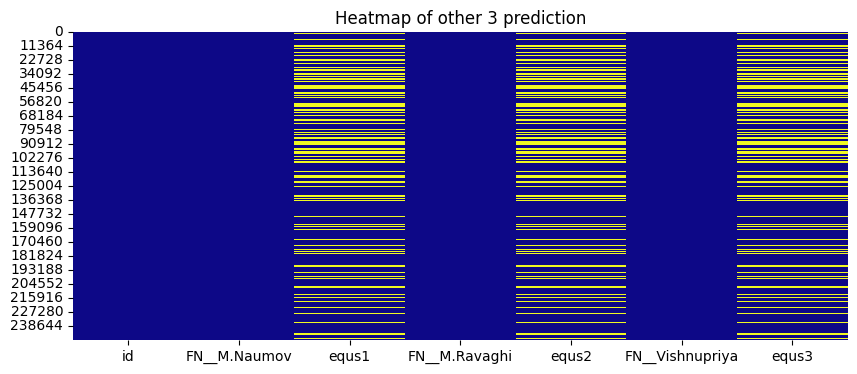

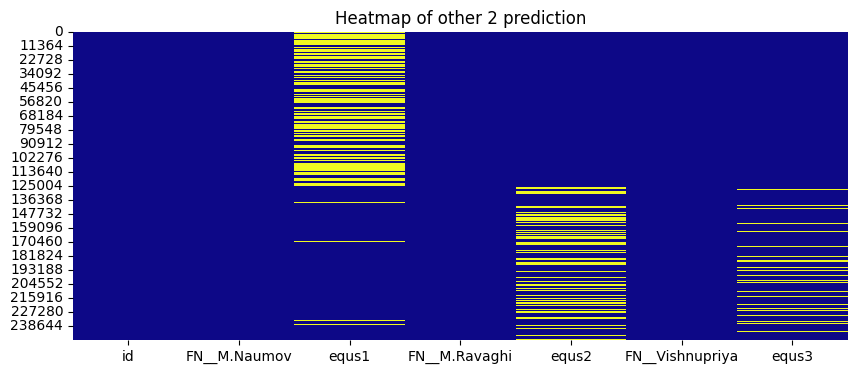

In [2]:
dfs1['equs1'] = dfs1.apply(lambda x: f_equs1a(x), axis=1)
dfs1['equs2'] = dfs1.apply(lambda x: f_equs2a(x), axis=1)
dfs1['equs3'] = dfs1.apply(lambda x: f_equs3a(x), axis=1)

plt.figure(figsize=(10, 4))
sns.heatmap(dfs1.isnull(), cbar=False, cmap="plasma")
plt.title("Heatmap of other 3 prediction")
plt.show()

print('\n\n')

dfs2['equs1'] = dfs2.apply(lambda x: f_equs1b(x), axis=1)
dfs2['equs2'] = dfs2.apply(lambda x: f_equs2b(x), axis=1)
dfs2['equs3'] = dfs2.apply(lambda x: f_equs3b(x), axis=1)

plt.figure(figsize=(10, 4))
sns.heatmap(dfs2.isnull(), cbar=False, cmap="plasma")
plt.title("Heatmap of other 2 prediction")
plt.show()

In [3]:
submissions = f'Added-1-8' # 'Added' -stored, 'public notebooks' -can be named!

if submissions == f'public notebooks':
    p = '/kaggle/input/'
    a = '/sub_logistic-regression_0.366356.csv'
    b = '/sub_logistic-regression_0.366237.csv'
    c = '/sub_logistic-regression_0.366120.csv'
    s = "/submission.csv"
    A = pd.read_csv(p+ 's05e06-fertilizer-optimization-ensemble' +a)
    B = pd.read_csv(p+ 's05e06-fertilizer-optimization-ensemble' +b)
    C = pd.read_csv(p+ 's05e06-fertilizer-optimization-ensemble' +c)
    V = pd.read_csv(p+ 'Fertilizer Name predicting with Metamodels'   +s)
    M = pd.read_csv(p+ 'Optimal Fertilizers | NN+XGB+LGBM+CAT+HGB+YDF'+s)
    
if submissions == f'Added-1-7':
    p1 = '/kaggle/input/fertilizer-1-7'
    p  = '/submission__LB_'
    _  = "___Added"
    A_ = pd.read_csv(p1+p+ '0_36826__v07__' +   'Mahdi_Ravaghi'  +_+'.csv')
    B_ = pd.read_csv(p1+p+ '0_36745__v08__' +   'Mahdi_Ravaghi'  +_+'.csv')
    C_ = pd.read_csv(p1+p+ '0_36718__v09__' +   'Mahdi_Ravaghi'  +_+'.csv')
    df =   A_    #     LB = 0.36_815
    df =   B_    #     LB = 0.36_792
    df =   C_    #     LB = 0.36_788

if submissions == f'Added-1-8':
    p2 = '/kaggle/input/fertilizer-1-8'
    p  = '/submission__LB_'
    _  = "___Added"
    V  = pd.read_csv(p2+p+ '0_36863__v01__' +   'Vishnupriya'    +_+'.csv')
    M  = pd.read_csv(p2+p+ '0_36826__v02__' +   'Mikhail_Naumov' +_+'.csv')
    df =   V     #     LB = 0.36_874
    df =   M     #     LB = 0.36_85?
    
df = M  

df.to_csv('submission.csv', index=False)

df


,id,Fertilizer Name
0,750000,10-26-26 20-20 DAP
1,750001,17-17-17 10-26-26 20-20
2,750002,20-20 28-28 Urea
3,750003,14-35-14 DAP 17-17-17
4,750004,20-20 Urea 10-26-26
...,...,...
249995,999995,Urea 28-28 14-35-14
249996,999996,17-17-17 14-35-14 10-26-26
249997,999997,DAP 10-26-26 Urea
249998,999998,10-26-26 28-28 17-17-17
